# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2023

Мягий дедлайн: 23:59 12.12.2023

Жестокий дедлайн: 23:59 14.12.2023

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/56884/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

%config InlineBackend.figure_format = 'retina'
plt.rcParams['font.size'] = 12
import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [ ]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0.)
]

In [ ]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

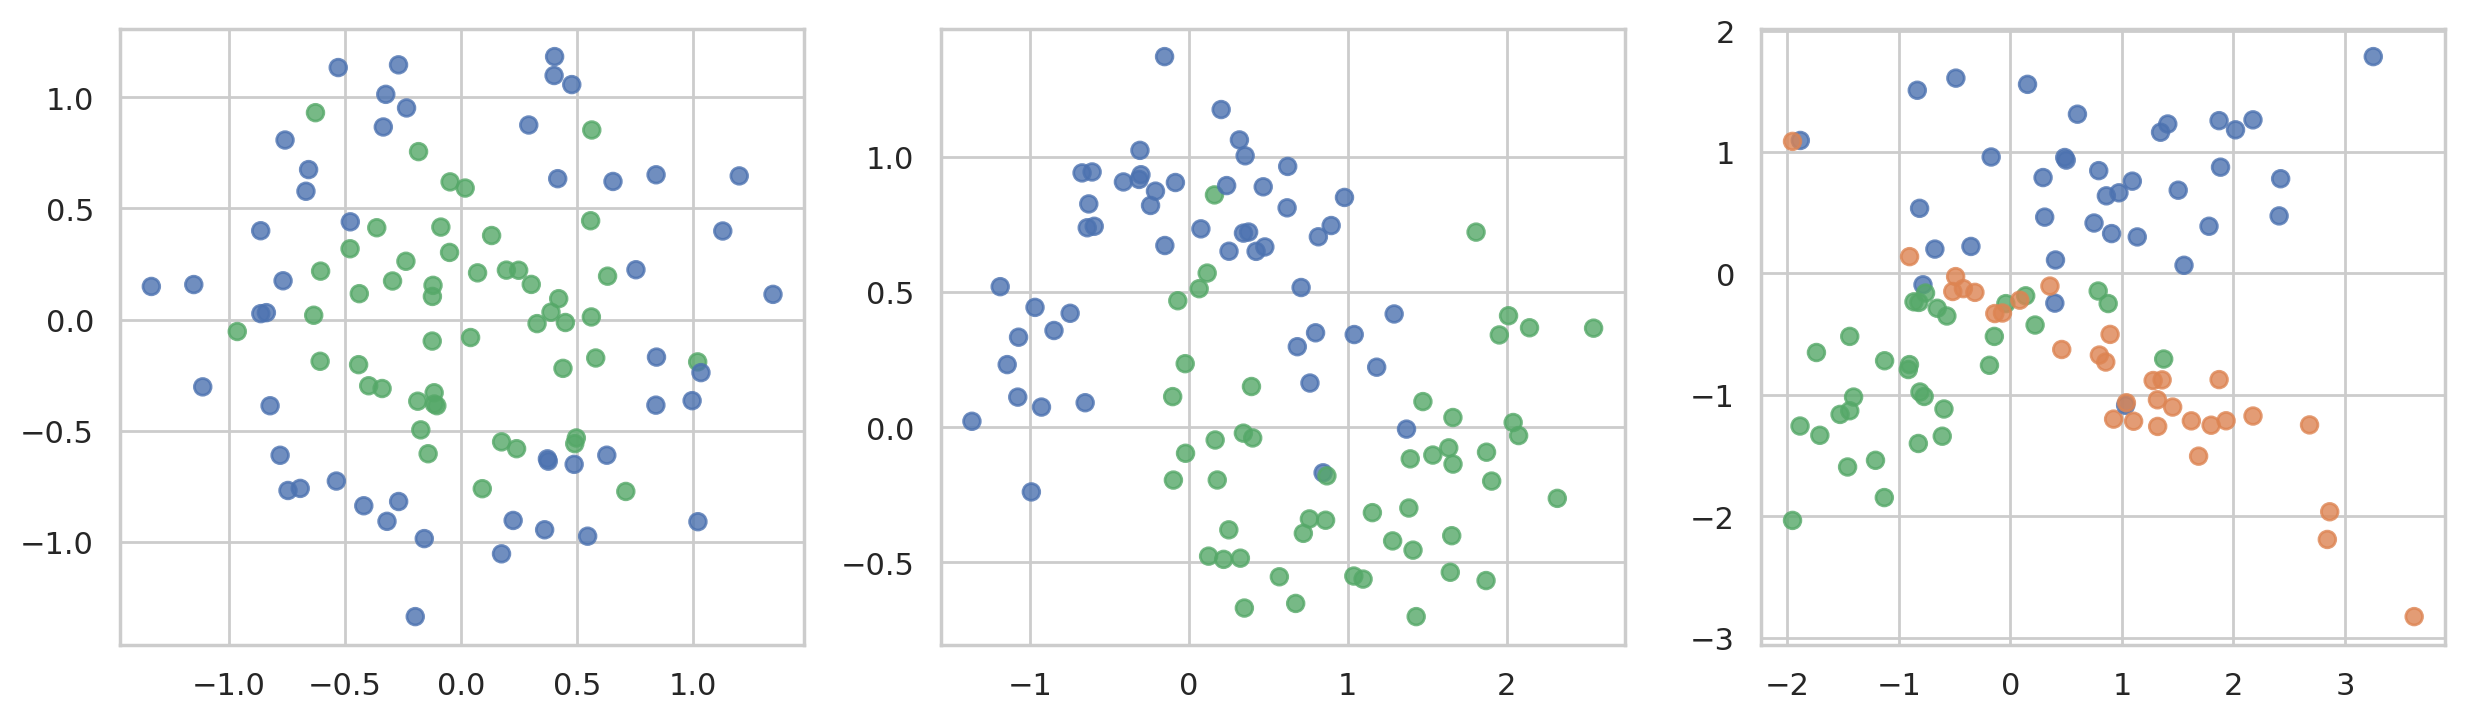

In [ ]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [ ]:
def plot_surface(clf, X, y, title="", ax=None):
    if ax is None:
        ax = plt
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)
    if ax is plt:
        ax.title(title)
    else:
        ax.set_title(title)

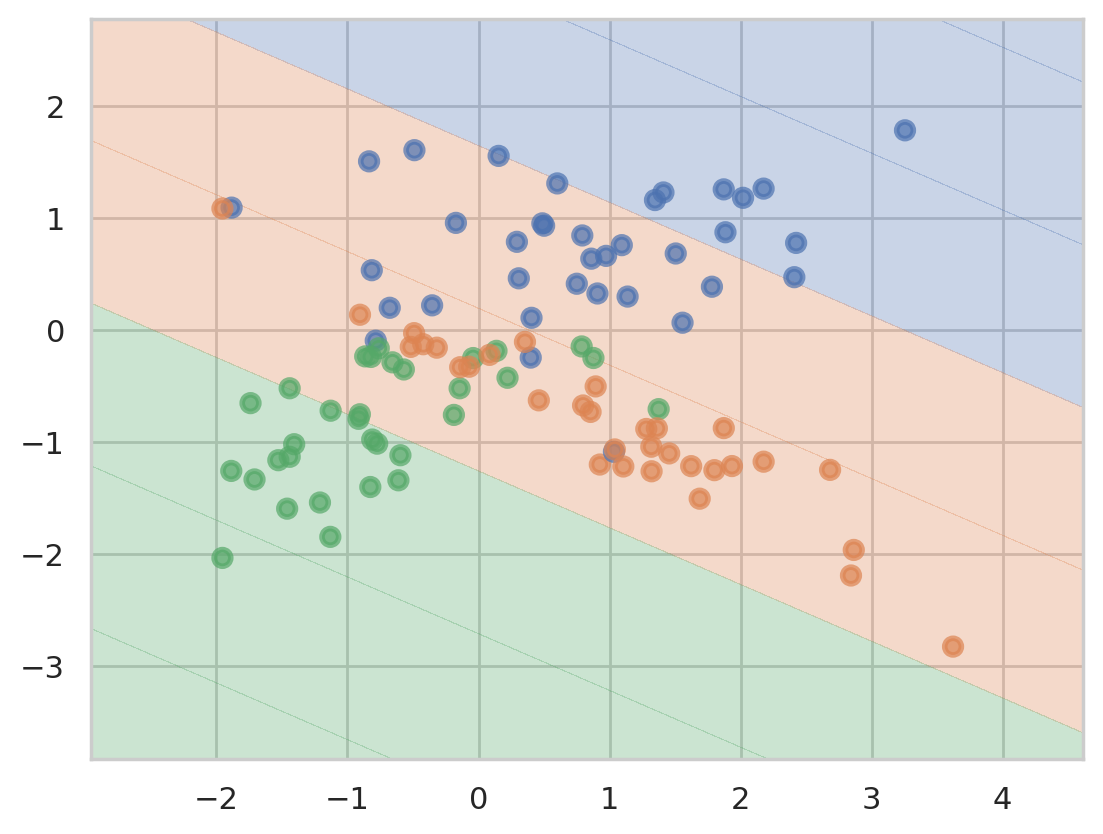

In [ ]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

dataset 0
    acc on train: 1.0
    acc on test: 0.6
dataset 1
    acc on train: 1.0
    acc on test: 0.8
dataset 2
    acc on train: 1.0
    acc on test: 0.8


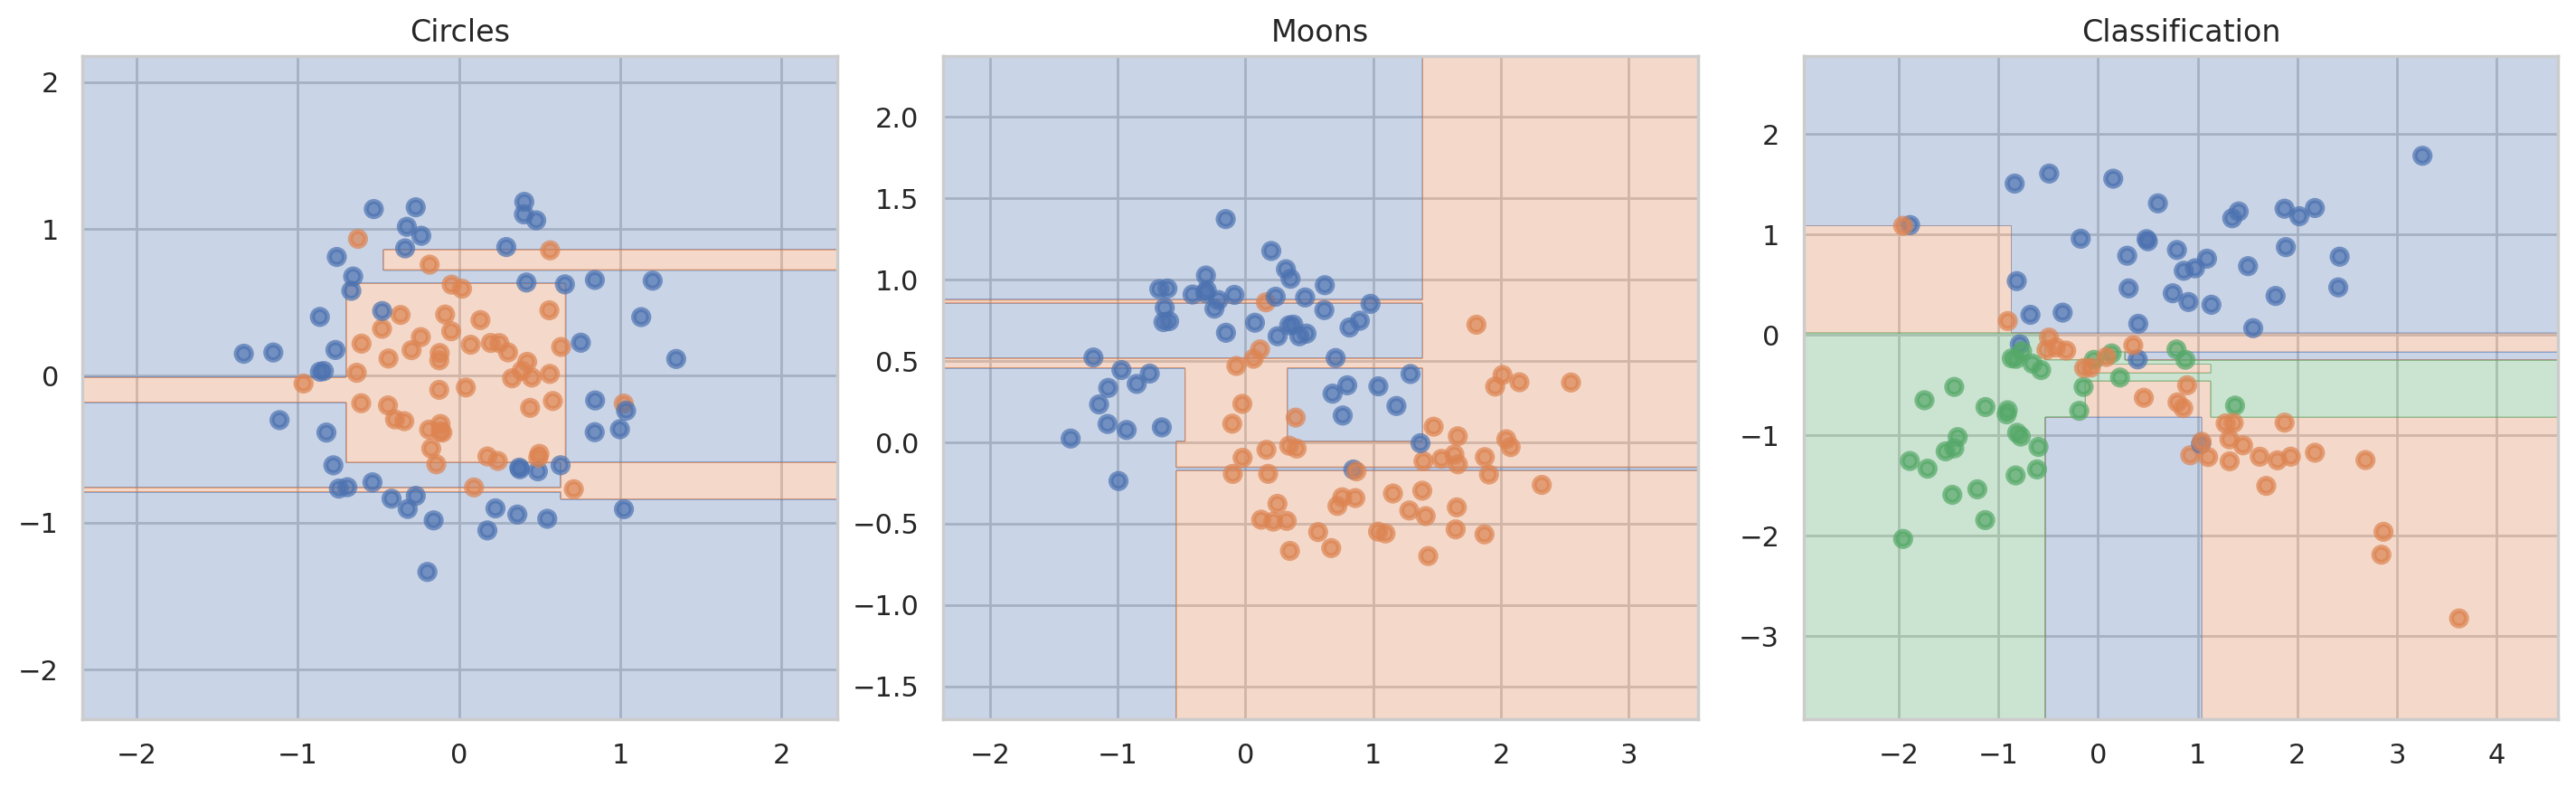

In [ ]:
from sklearn.metrics import accuracy_score

_, axes = plt.subplots(1, 3, figsize=(15, 5))
titles = ["Circles", "Moons", "Classification"]

for i, (x, y) in enumerate(datasets):
    clf = DecisionTreeClassifier()
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    clf.fit(X_train, y_train)

    pred_train, pred_test = clf.predict(X_train), clf.predict(X_test)
    acc_train, acc_test = accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)
    print(f"dataset {i}\n    acc on train: {acc_train}\n    acc on test: {acc_test}")
    plot_surface(clf, x, y, title=titles[i], ax=axes[i])


__Ответ:__ Accuracy на тесте упала не сильно, что говорит о том, что деревья не слишком переобучились. Скорее всего, данные слишком простые, чтобы на них увидеть сильное переобучение деревьев

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

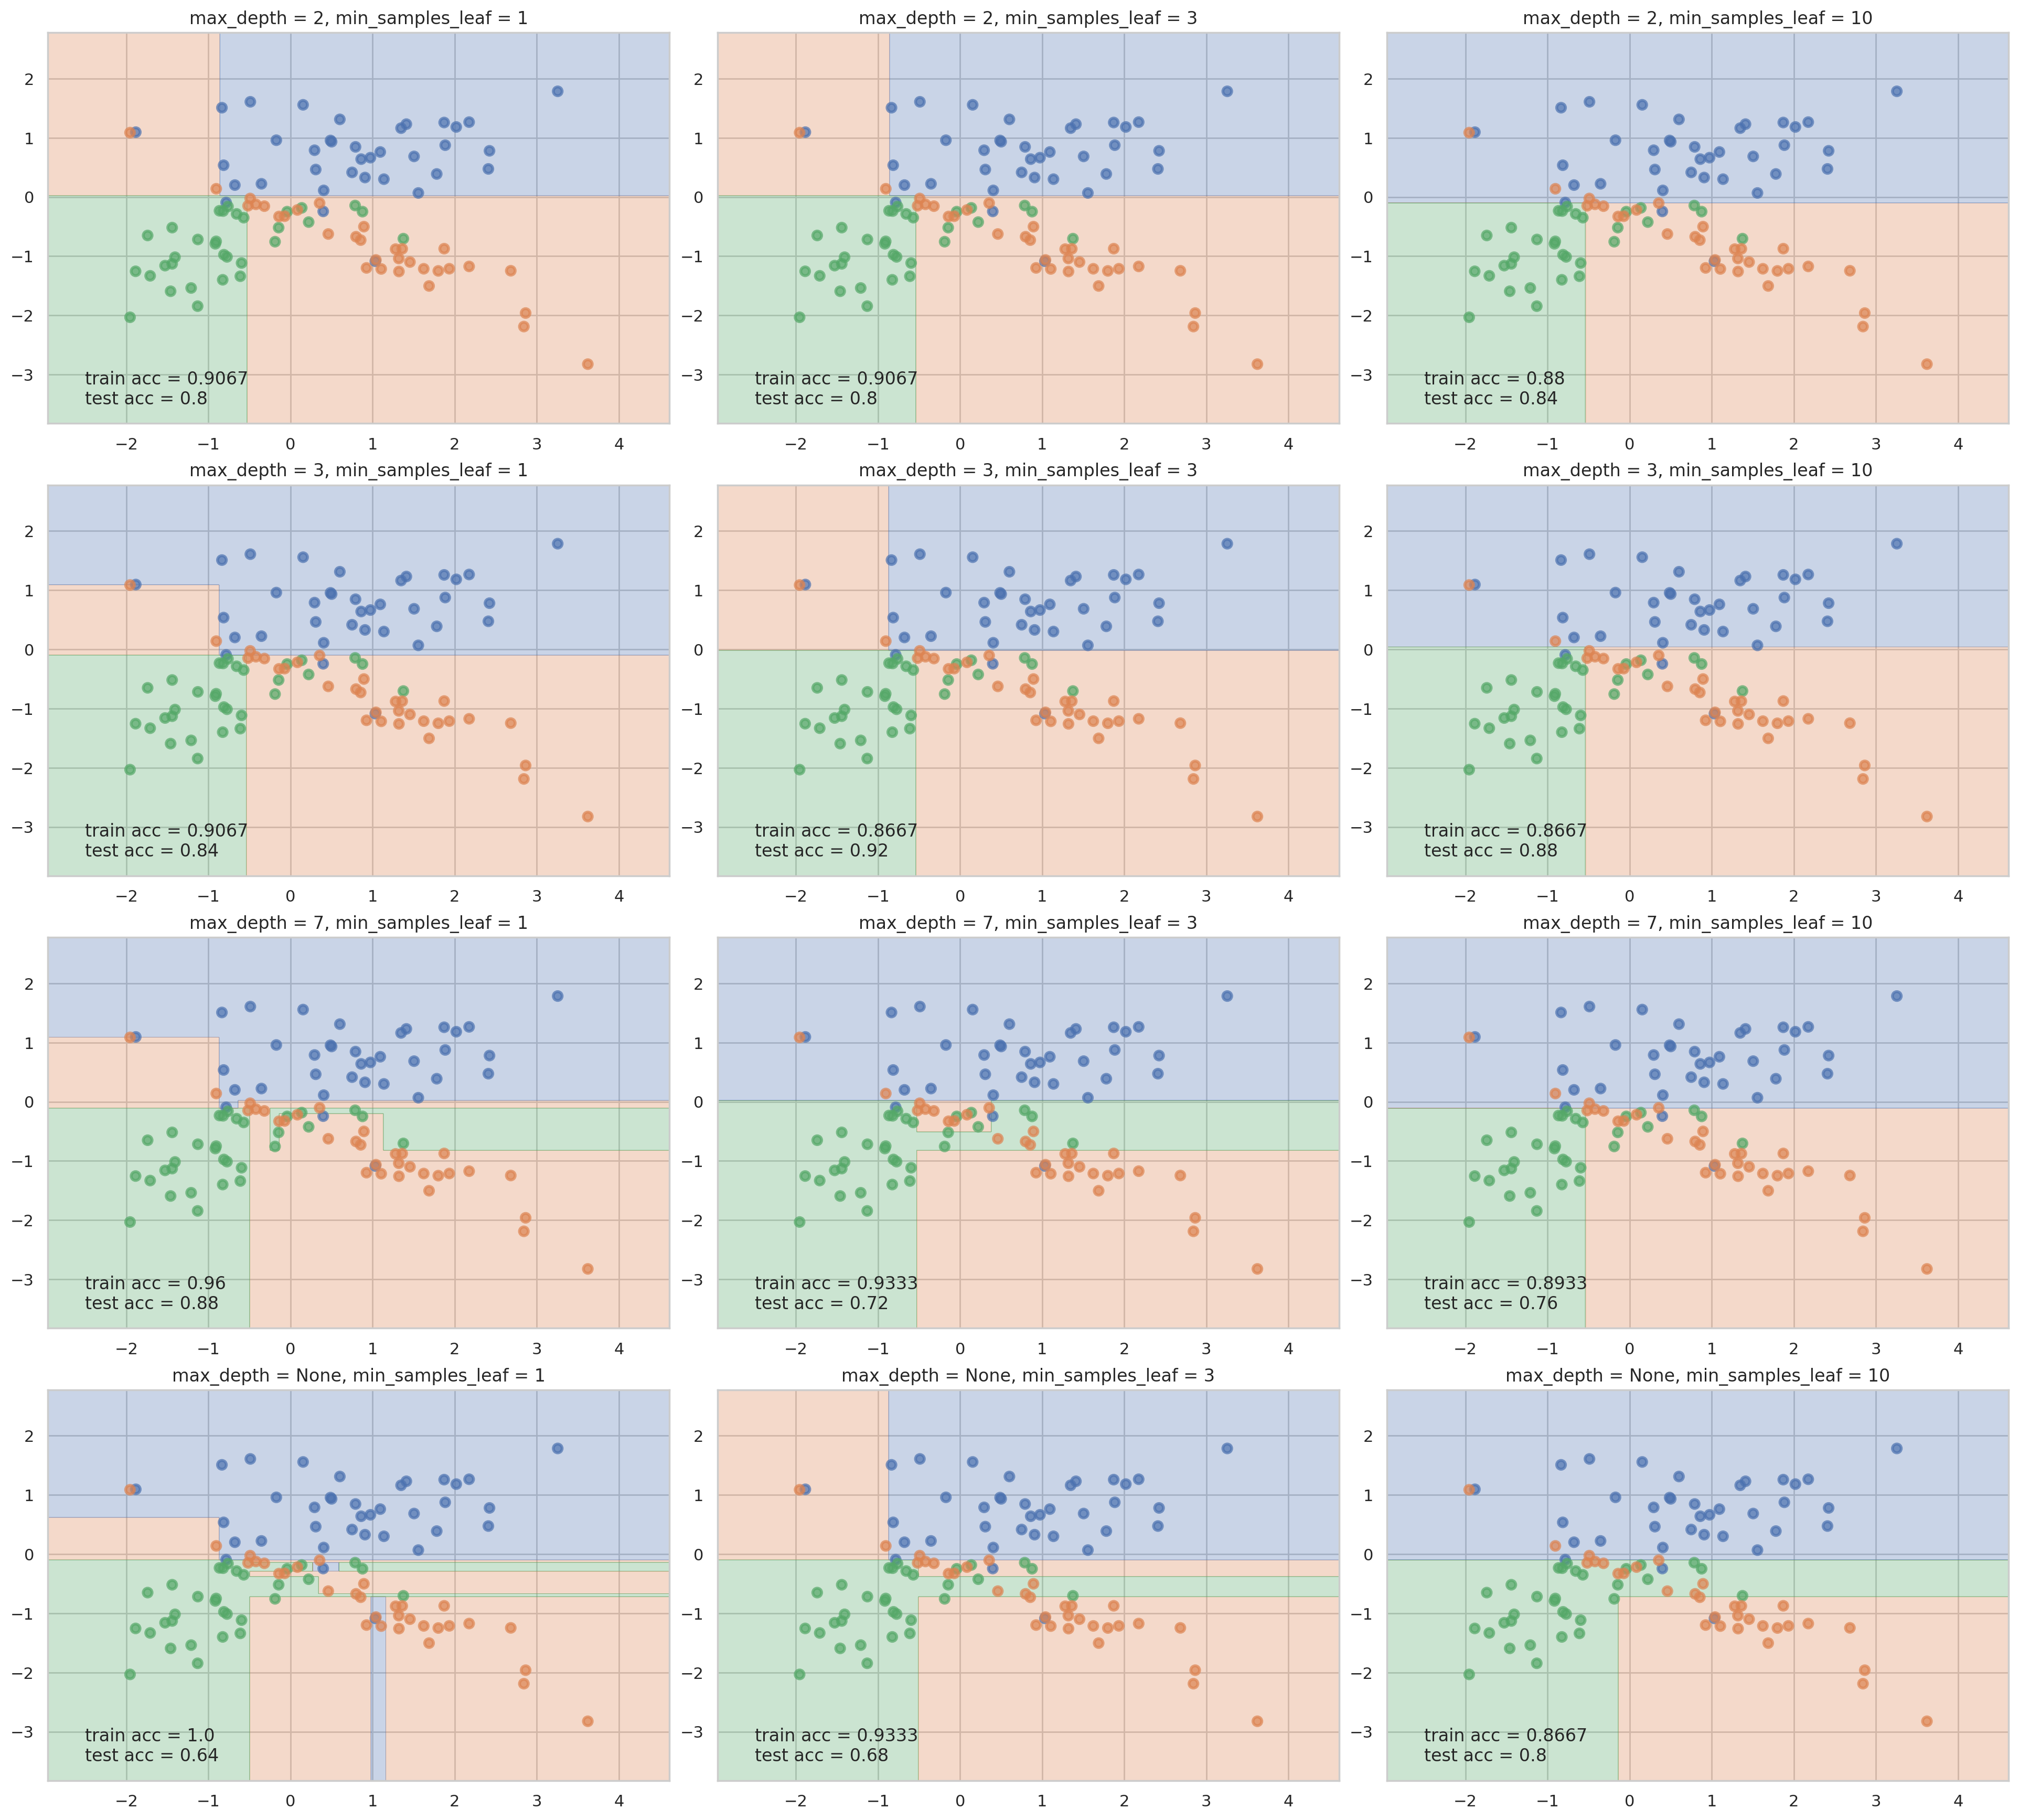

In [ ]:
from sklearn.model_selection import GridSearchCV

X, y = datasets[2][0], datasets[2][1]

max_depth_set = [2, 3, 7, None]
min_samples_leaf_set = [1, 3, 10]

clf = DecisionTreeClassifier()
searcher = GridSearchCV(
    estimator=clf,
    param_grid={
        "max_depth": max_depth_set,
        "min_samples_leaf": min_samples_leaf_set
    },
    scoring="accuracy"
)

searcher.fit(X, y)

params = searcher.cv_results_["params"]

_, axes = plt.subplots(len(max_depth_set),
                       len(min_samples_leaf_set),
                       figsize=(20, 18))

for i, p in enumerate(params):
    param = params[i]
    clf = DecisionTreeClassifier(
        max_depth=param["max_depth"],
        min_samples_leaf=param["min_samples_leaf"]
    )

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    clf.fit(X_train, y_train)
    pred_train, pred_test = clf.predict(X_train), clf.predict(X_test)
    acc_train, acc_test = accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

    ax = axes[i // len(min_samples_leaf_set)][i % len(min_samples_leaf_set)]
    title = f"max_depth = {param['max_depth']}, min_samples_leaf = {param['min_samples_leaf']}"
    text = f"train acc = {round(acc_train, 4)}\ntest acc = {round(acc_test, 4)}"

    plot_surface(clf, X, y, ax=ax, title=title)
    ax.text(-2.5, -3.5, text)


__Ответ:__

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

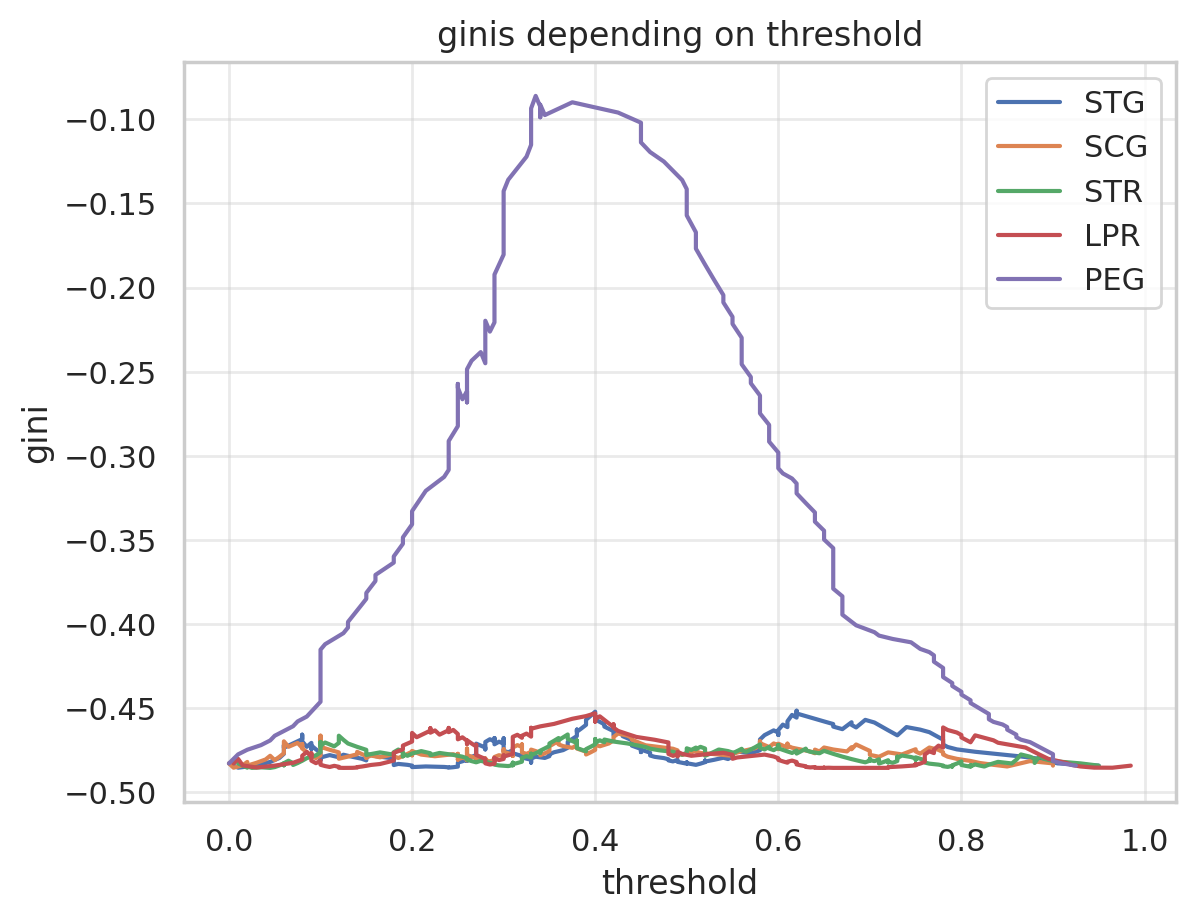

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from hw5code import find_best_split

df = pd.read_csv("students.csv")

columns = df.columns[:-1]
for c in columns:
    thr, ginis, bt, bg = find_best_split(df[c].to_numpy(), df["UNS"].to_numpy())
    plt.plot(thr, ginis, label=c)
plt.title("ginis depending on threshold")
plt.xlabel("threshold")
plt.ylabel("gini")
plt.legend()
plt.grid(alpha=0.4)


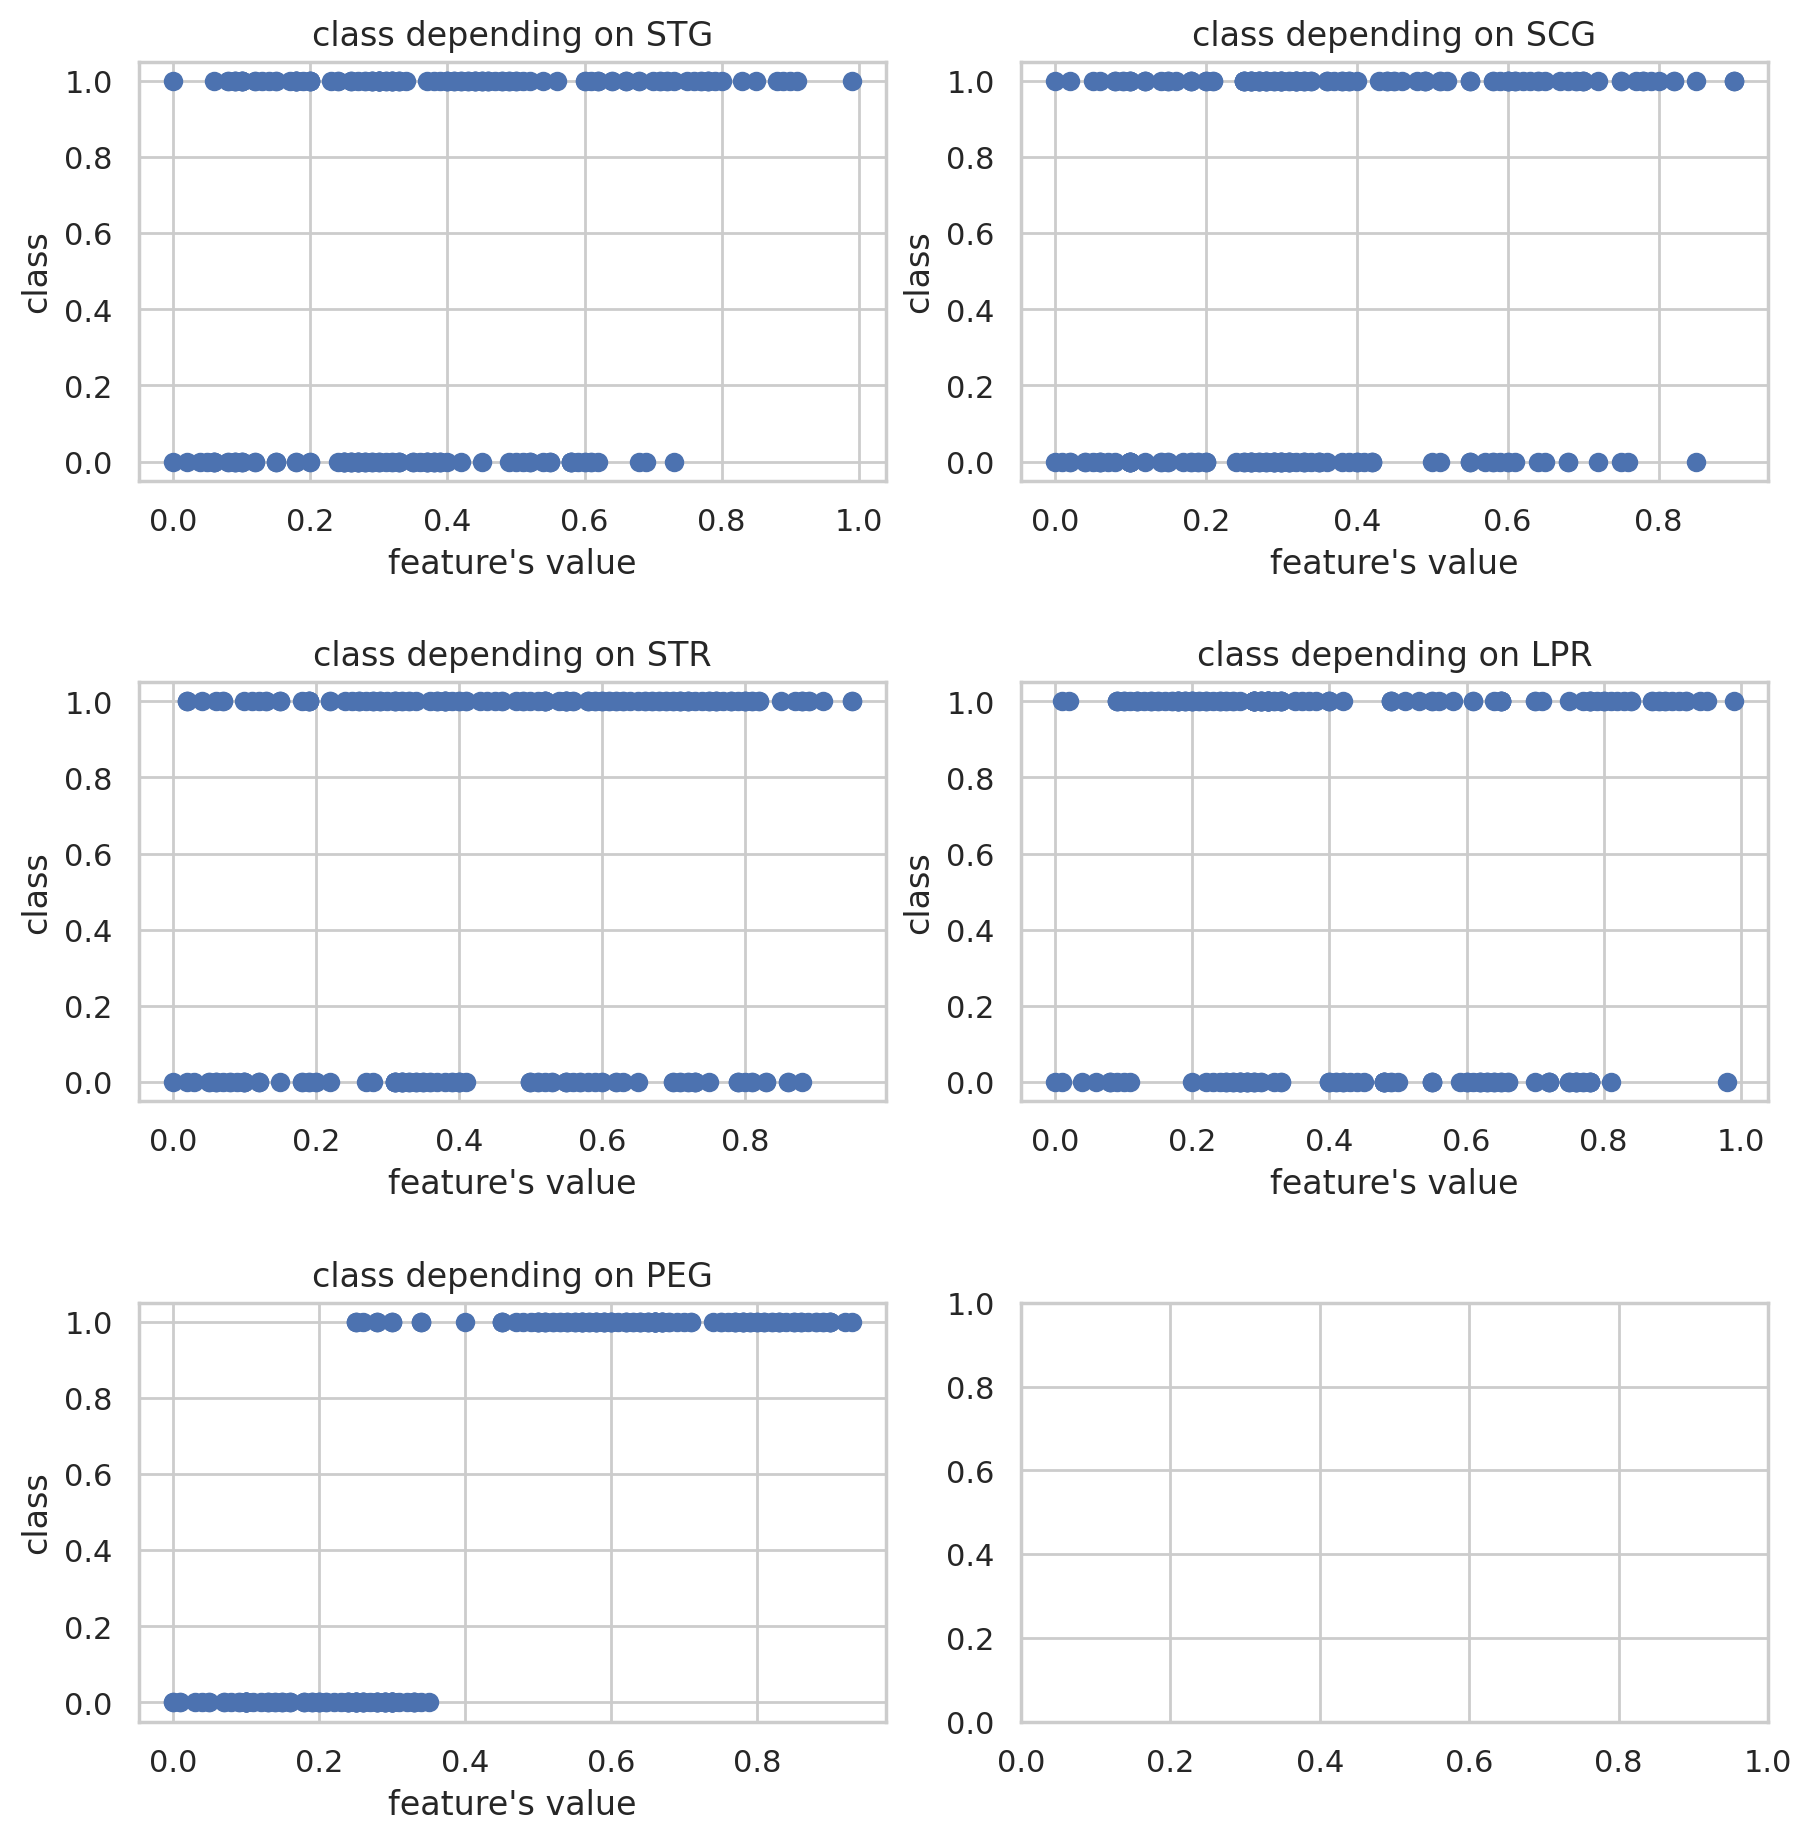

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(9, 9))

fig.tight_layout(h_pad=4)

for i, c in enumerate(columns):
    ax[i // 2, i % 2].scatter(df[c], df["UNS"])
    ax[i // 2, i % 2].set_title(f"class depending on {c}")
    ax[i // 2, i % 2].set_xlabel("feature's value")
    ax[i // 2, i % 2].set_ylabel("class")

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** По признаку PEG, тк для него значение критерия Джини максимально. Это согласуется со scatter plot, тк на графике видно, что PEG можно более-менее оптимально разделить прямой линией. Вид кривой критерия Джини для признаков, которые делят выборку почти идеально напоминает перевернутую параболу (информативность возрастает до того момента, пока в левое поддерево попадает все больше 0, и останавливается, когда достигнут оптимальный порог).
Для признаков, по которым деление почти невозможно, скорее всего, кривая критерия Джини будет похожа на прямую линию с небольшими рандомными колебаниями

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [ ]:
!wget https://archive.ics.uci.edu/static/public/73/mushroom.zip
!unzip mushroom.zip -d mushroom
!rm mushroom.zip

--2023-12-03 08:35:00--  https://archive.ics.uci.edu/static/public/73/mushroom.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘mushroom.zip’

mushroom.zip            [ <=>                ] 138.01K  --.-KB/s    in 0.03s   

2023-12-03 08:35:00 (3.85 MB/s) - ‘mushroom.zip’ saved [141318]

Archive:  mushroom.zip
  inflating: mushroom/Index          
  inflating: mushroom/README         
  inflating: mushroom/agaricus-lepiota.data  
  inflating: mushroom/agaricus-lepiota.names  
  inflating: mushroom/expanded.Z     


In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.preprocessing import LabelEncoder
from hw5code import DecisionTree
from sklearn.model_selection import train_test_split

df = pd.read_csv("mushroom/agaricus-lepiota.data")
feature_types = []

enc = LabelEncoder()
for c in df.columns:
    df[c] = enc.fit_transform(df[c])
    feature_types.append("categorical")

X, y = df.drop(columns=["p"]), df["p"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=True)
X_train, X_test, y_train, y_test = list(map(lambda x: x.to_numpy(), [X_train, X_test, y_train, y_test]))

In [ ]:
dtree = DecisionTree(feature_types=feature_types)
dtree.fit(X_train, y_train)

In [ ]:
train_pred, test_pred = dtree.predict(X_train), dtree.predict(X_test)
train_acc, test_acc = accuracy_score(y_train, train_pred), accuracy_score(y_test, test_pred)
print(f"accuracy on train = {train_acc}\naccuracy on test = {test_acc}")

accuracy on train = 1.0
accuracy on test = 0.999015263417036


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
!wget https://archive.ics.uci.edu/static/public/19/car+evaluation.zip
!unzip car+evaluation.zip -d car_evaluation/
!wget https://archive.ics.uci.edu/static/public/76/nursery.zip
!unzip nursery.zip -d nursery/
!rm nursery.zip
!rm car+evaluation.zip

--2023-12-03 08:35:01--  https://archive.ics.uci.edu/static/public/19/car+evaluation.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘car+evaluation.zip’

car+evaluation.zip      [ <=>                ]   6.19K  --.-KB/s    in 0s      

2023-12-03 08:35:01 (135 MB/s) - ‘car+evaluation.zip’ saved [6342]

Archive:  car+evaluation.zip
  inflating: car_evaluation/car.c45-names  
  inflating: car_evaluation/car.data  
  inflating: car_evaluation/car.names  
--2023-12-03 08:35:01--  https://archive.ics.uci.edu/static/public/76/nursery.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘nursery.zip’

nursery.zip    

In [ ]:
df = pd.read_csv("mushroom/agaricus-lepiota.data")
ttt_df = pd.read_csv("tic-tac-toe-endgame.csv")
cars_df = pd.read_csv("car_evaluation/car.data")
nursery_df = pd.read_csv("nursery/nursery.data")

In [ ]:
enc = LabelEncoder()
for c in df.columns:
    df[c] = enc.fit_transform(df[c])

for c in ttt_df.columns:
    ttt_df[c] = enc.fit_transform(ttt_df[c])

positive_class = {"good", "vgood"}
cars_df["unacc"] = cars_df["unacc"].apply(lambda x: 1 if x in positive_class else 0)
for c in cars_df.columns:
    cars_df[c] = enc.fit_transform(cars_df[c])

positive_class = {"very_recom", "priority", "spec_prior"}
nursery_df["recommend"] = nursery_df["recommend"].apply(lambda x: 1 if x in positive_class else 0)
for c in nursery_df.columns:
    nursery_df[c] = enc.fit_transform(nursery_df[c])

datasets = [df, ttt_df, cars_df, nursery_df]

target_columns = ["p", "V10", "unacc", "recommend"]

In [ ]:
ohe = OneHotEncoder(sparse=False)
y = ttt_df[target_columns[1]]
X_enc = ohe.fit_transform(ttt_df.drop(columns=[target_columns[1]]))
X_enc

array([[0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import make_scorer

results = pd.DataFrame({
    "all_real": [],
    "all_categorical": [],
    "one_hot_encoding": [],
    "sklearn_tree": []
})

for i, df in enumerate(datasets):
    # 1 - all are real
    feature_types = ["real"] * df.shape[1]
    cv_all_real = cross_val_score(
        estimator=DecisionTree(feature_types),
        X=df.drop(columns=[target_columns[i]]).to_numpy(),
        y=df[target_columns[i]].to_numpy(),
        scoring=make_scorer(accuracy_score),
        cv=10
    ).mean()
    # 2 - all are categorical
    feature_types = ["categorical"] * df.shape[1]
    cv_all_categorical = cross_val_score(
        estimator=DecisionTree(feature_types),
        X=df.drop(columns=[target_columns[i]]).to_numpy(),
        y=df[target_columns[i]].to_numpy(),
        scoring=make_scorer(accuracy_score),
        cv=10
    ).mean()
    # 3 - real + one hot
    ohe = OneHotEncoder(sparse=False)
    y = df[target_columns[i]]
    X_enc = ohe.fit_transform(df.drop(columns=[target_columns[i]]))
    feature_types = ["real"] * X_enc.shape[1]
    cv_ohe = cross_val_score(
        estimator=DecisionTree(feature_types),
        X=X_enc,
        y=y.to_numpy(),
        scoring=make_scorer(accuracy_score),
        cv=10
    ).mean()
    # 4 - sklearn tree
    dtree = DecisionTreeClassifier()
    cv_sklearn_est = cross_val_score(
        estimator=dtree,
        X=df.drop(columns=[target_columns[i]]).to_numpy(),
        y=df[target_columns[i]].to_numpy(),
        scoring=make_scorer(accuracy_score),
        cv=10
    ).mean()
    current_result = pd.DataFrame({
        "all_real": [cv_all_real],
        "all_categorical": [cv_all_categorical],
        "one_hot_encoding": [cv_ohe],
        "sklearn_tree": [cv_sklearn_est]
    })
    print("PASSSSSSSSSSSSSED", i)
    results = pd.concat([results, current_result])

PASSSSSSSSSSSSSED 0


ValueError: ignored

__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента.
Одинаково ли для разных наборов данных ранжируются алгоритмы?
Порассуждайте, почему так происходит.

Обратите внимание на значение признаков в разных наборах данных.
Присутствует ли в результатах какая-то компонента случайности?
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**

Вставьте что угодно, описывающее ваши впечатления от этого задания: